# Teil 1

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [53]:
cars = pd.read_csv("autoscout24-germany-dataset-clean.CSV", ";")

C:\Apps\Python\lib\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45878 entries, 0 to 45877
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mileage    45878 non-null  int64 
 1   make       45878 non-null  object
 2   model      45878 non-null  object
 3   fuel       45878 non-null  object
 4   gear       45878 non-null  object
 5   offerType  45878 non-null  object
 6   price      45878 non-null  int64 
 7   hp         45878 non-null  int64 
 8   year       45878 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.2+ MB


# Teil 2

2.1:

Ich möchte den Preis vorhersagen können, dieser wird vom ML Algorythmus berechnet. Damit kann ich dann, falls ich ein Auto in Deutschland verkaufen möchte, eine Vorhersage für den Preis treffen.

2.2:


In [4]:
cars["mileage"].mean()

71336.5194864641

In [5]:
cars["price"].mean()

16598.5691616897

In [6]:
cars["hp"].mean()

133.35683769998693

In [7]:
cars["make"].describe()

count          45878
unique            66
top       Volkswagen
freq            6907
Name: make, dtype: object

In [8]:
cars["model"].describe()

count     45878
unique      826
top        Golf
freq       1489
Name: model, dtype: object

In [9]:
cars["fuel"].describe()

count        45878
unique          11
top       Gasoline
freq         28703
Name: fuel, dtype: object

In [10]:
cars["gear"].describe()

count      45878
unique         3
top       Manual
freq       30285
Name: gear, dtype: object

In [11]:
cars["offerType"].describe()

count     45878
unique        5
top        Used
freq      39644
Name: offerType, dtype: object

In [12]:
min(cars["year"]), max(cars["year"])

(2011, 2021)

In [13]:
min(cars["price"]), max(cars["price"])

(1100, 1199900)

In [14]:
min(cars["hp"]), max(cars["hp"])

(60, 850)

In [15]:
min(cars["mileage"]), max(cars["mileage"])

(0, 1111111)

2.3:

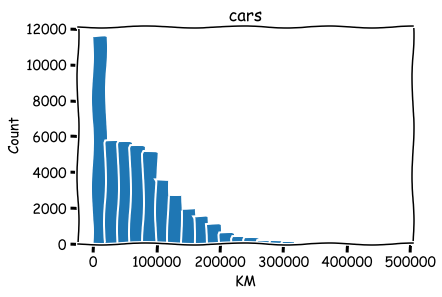

In [16]:
with plt.xkcd():
    # pay attention here: we're using .dropna() to exclude
    # NaN values from what we're displaying here. This is 
    # a nice trick that you can use often when working
    # with pandas
    # Secondly, instead of writing [0,10,20,30 ..., 80],
    # we're using the python range-function
    plt.hist(cars["mileage"], bins=range(0,500000,20000))
    plt.title("cars")
    plt.xlabel("KM")
    plt.ylabel("Count")

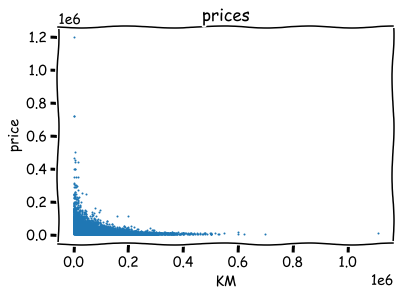

In [17]:
with plt.xkcd():
    plt.scatter(cars["mileage"].dropna(), cars["price"].dropna(), 1)
    plt.title("prices")
    plt.xlabel("KM")
    plt.ylabel("price")

2.4:

In [54]:
X = cars[["mileage", "make", "model", "fuel", "gear", "offerType", "hp", "year"]]
y = cars[["price"]]
X.head()

,mileage,make,model,fuel,gear,offerType,hp,year
0,235000,BMW,316,Diesel,Manual,Used,116,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,122,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,160,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,110,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,156,2011


In [55]:
standard_scaler = preprocessing.MinMaxScaler().fit(X[["mileage", "hp"]])

def scale(dataframe, columns, scaler):
    scaled = scaler.transform(dataframe[columns])
    dataframe[columns] = pd.DataFrame(scaled, columns=columns)
    return dataframe

X = scale(X, ["mileage", "hp"], standard_scaler)
X.head()

C:\Users\Sami\AppData\Local\Temp\ipykernel_424\3749640591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns] = pd.DataFrame(scaled, columns=columns)


,mileage,make,model,fuel,gear,offerType,hp,year
0,0.21150,BMW,316,Diesel,Manual,Used,0.070886,2011
1,0.08352,Volkswagen,Golf,Gasoline,Manual,Used,0.078481,2011
2,0.13437,SEAT,Exeo,Gasoline,Manual,Used,0.126582,2011
3,0.08658,Renault,Megane,Gasoline,Manual,Used,0.063291,2011
4,0.14040,Peugeot,308,Gasoline,Manual,Used,0.121519,2011


In [56]:
oe = preprocessing.OrdinalEncoder().fit(X[["make"]])
X[["make"]] = oe.transform(X[["make"]])

oe = preprocessing.OrdinalEncoder().fit(X[["model"]])
X[["model"]] = oe.transform(X[["model"]])

oe = preprocessing.OrdinalEncoder().fit(X[["fuel"]])
X[["fuel"]] = oe.transform(X[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(X[["gear"]])
X[["gear"]] = oe.transform(X[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(X[["offerType"]])
X[["offerType"]] = oe.transform(X[["offerType"]])

X["year"] = X["year"] - 2000

C:\Users\Sami\AppData\Local\Temp\ipykernel_424\75427839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["make"]] = oe.transform(X[["make"]])
C:\Users\Sami\AppData\Local\Temp\ipykernel_424\75427839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[["model"]] = oe.transform(X[["model"]])
C:\Users\Sami\AppData\Local\Temp\ipykernel_424\75427839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [7]:
X.head(10)

,mileage,make,model,fuel,gear,offerType,hp,year
0,0.211500,6.0,33.0,2.0,1.0,4.0,0.070886,11
1,0.083520,63.0,389.0,7.0,1.0,4.0,0.078481,11
2,0.134370,56.0,317.0,7.0,1.0,4.0,0.126582,11
3,0.086580,54.0,498.0,7.0,1.0,4.0,0.063291,11
4,0.140400,49.0,32.0,7.0,1.0,4.0,0.121519,11
5,0.132300,62.0,133.0,5.0,0.0,4.0,0.049367,11
6,0.082705,54.0,666.0,2.0,1.0,4.0,0.089873,11
7,0.114750,47.0,805.0,7.0,1.0,4.0,0.070886,11
8,0.103500,41.0,26.0,7.0,0.0,4.0,0.113924,11
9,0.000094,24.0,728.0,2.0,1.0,4.0,0.032911,11


# Teil 3

3.1

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size = 0.2, random_state = 42
)

len(X_train), len(X_test)

(36702, 9176)

3.2

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

algorithms = {
    "Nearest Neighbors" : KNeighborsClassifier(1),
    "lasso" : ElasticNetCV(),
    "RidgeRegression" : Ridge(),
    "GB" : GradientBoostingRegressor(),

}


for name, algorithm in algorithms.items():
    # 👾 TODO: Run each algorithm on X_train and y_train
    # using the .fit function; then evaluate it using
    # algorithm.score(X_test, y_test) and print the
    # name and score for each algorithm - which one 
    # performs the best?
    
    # You might need to use y_train.values.ravel()
    # rather than y_train in the fit()-function
    algorithm.fit(X_train, y_train.values.ravel())

    score = algorithm.score(X_test, y_test)
    print(name, round(score,2))

Nearest Neighbors 0.08
lasso 0.04
RidgeRegression 0.72
GB 0.88


Ich habe verschiedene Tests durchgeführt um so viel effektivität wie möglich zu erzielen, leider schafft der Algorithmus nur 8% der Vorhersagen richtig zu beantworten. Das liegt daran, dass ML eben doch nicht so einfach ist. der Algorithmus "Nearest Neighbors" mit dem Parameter 1 hat am besten Abgeschnitten von den ganzen Tests.

EDIT:

Ich habe mir die Präsentation angeschaut und einen weitere Algorithmen probiert. Meine neue Erkenntnis:
Angeblich sollte der Algorithmus zu 72% genau sein, allerdings ist dieser Wert nicht wirklich ausschlaggebend, da die Ergebnisse zu hoch sind, als wenn es ein realistischer Marktpreis sein könnte. Daher werde ich weiterhin Nearest Neighbors verwenden.

3.3

In [59]:
import joblib

In [180]:
joblib.dump(algorithms["Nearest Neighbors"], 'cars_nearest_neighbors.joblib')
NN = joblib.load('cars_nearest_neighbors.joblib')
NN

KNeighborsClassifier(n_neighbors=1)

In [121]:
joblib.dump(algorithms["lasso"], 'cars_lasso.joblib')
lasso = joblib.load('cars_lasso.joblib')
lasso

ElasticNetCV()

In [122]:
joblib.dump(algorithms["RidgeRegression"], 'cars_ridgeregression.joblib')
ridge = joblib.load('cars_ridgeregression.joblib')
ridge

Ridge()

In [148]:
joblib.dump(algorithms["GB"], 'cars_gb.joblib')
gb = joblib.load('cars_gb.joblib')
gb

GradientBoostingRegressor()

In [112]:
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156,2011


NN-Prediction:

In [178]:
audiA4 = pd.DataFrame([[220000, "Audi", "A4", "Diesel", "Automatic", "used", 240, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = NN.predict(audiA4)

predictions

array([6099], dtype=int64)

In [183]:
audiA4 = pd.DataFrame([[17000, "Mercedes", "C63", "Gasoline", "Automatic", "used", 570, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = NN.predict(audiA4)

predictions

array([20650,  7499, 17989, ..., 14790, 14850,  6999], dtype=int64)

lasso-Prediction:

In [127]:
audiA4 = pd.DataFrame([[220000, "Audi", "A4", "Diesel", "Automatic", "used", 240, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = lasso.predict(audiA4)

predictions

array([17777.11236305])

In [134]:
audiA4 = pd.DataFrame([[170000, "Mercedes", "C63", "Gasoline", "Automatic", "used", 570, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = lasso.predict(audiA4)

predictions

array([17779.83405252])

RidgeRegression-Prediction:

In [128]:
audiA4 = pd.DataFrame([[220000, "Audi", "A4", "Diesel", "Automatic", "used", 240, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = ridge.predict(audiA4)

predictions

array([26329.36246089])

In [145]:
audiA4 = pd.DataFrame([[170000, "Mercedes", "C63", "Gasoline", "Automatic", "used", 570, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = ridge.predict(audiA4)

predictions

array([90617.89977129])

Gradient Boosting Regressor:

In [150]:
audiA4 = pd.DataFrame([[220000, "Audi", "A4", "Diesel", "Automatic", "used", 240, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = gb.predict(audiA4)

predictions

array([21560.64732236])

In [161]:
audiA4 = pd.DataFrame([[170000, "Mercedes", "C63", "Gasoline", "Automatic", "used", 570, 2011]], columns=X_train.columns)
audiA4 = scale(audiA4, ["mileage", "hp"], standard_scaler)

oe = preprocessing.OrdinalEncoder().fit(audiA4[["make"]])
audiA4[["make"]] = oe.transform(audiA4[["make"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["model"]])
audiA4[["model"]] = oe.transform(audiA4[["model"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["fuel"]])
audiA4[["fuel"]] = oe.transform(audiA4[["fuel"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["gear"]])
audiA4[["gear"]] = oe.transform(audiA4[["gear"]])

oe = preprocessing.OrdinalEncoder().fit(audiA4[["offerType"]])
audiA4[["offerType"]] = oe.transform(audiA4[["offerType"]])

audiA4["year"] = audiA4["year"] - 2000

predictions = gb.predict(audiA4)

predictions

array([103514.07502139])

Wie Sie anhand der Tests sehen habe ich mehrere Algorithmen getestet, das obwohl  es laut den Ergebnissen eindeutig sein sollte welchen Algorithmus ich wähle, leider ist es doch nicht so offensichtlich wie gedacht, da dieser Score mit viel vorsicht genossen werden sollte. Die beiden Algorithmen mit dem hohen Score funktionierten komplett entgegen meiner Erwartungen, ich hatte die Hoffnung gute Vorhersagen treffen zu können, leider war dem nur bedingt so. Nur der Nearest Neighbor Algorithmus hat auch wirklich alle Features als ausschlaggebend emfunden. Die anderen Algorithmen haben zwar Zeitweise bessere oder dynamischere Ergebnisse geliefert, jedoch haben diese oft keinen Wert, da sie viel zu hoch oder einfach unrealistisch und falsch sind. Meine Erkenntnis aus dem ganzen ist, dass ML-Algorithmen nicht so einfach sind wie es dieses Modul beschrieben hat. Ich dachte am Anfang wirklich, dass ich am Ende ein funktionierendes Model habe.

# Teil 4

4.1

Nearest Neighbors:

Text(0, 0.5, 'Mean decrease in impurity')

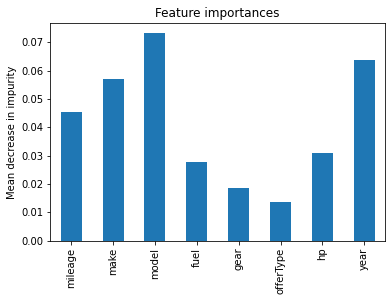

In [125]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    NN, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

lasso:

Text(0, 0.5, 'Mean decrease in impurity')

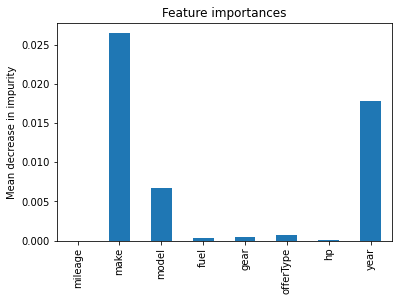

In [124]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    lasso, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

RidgeRegressor:

Text(0, 0.5, 'Mean decrease in impurity')

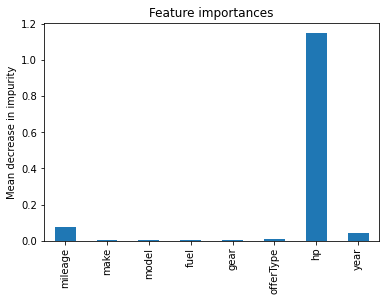

In [123]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    ridge, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

GradientBoostingRegressor:

Text(0, 0.5, 'Mean decrease in impurity')

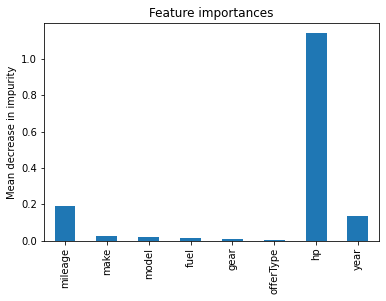

In [152]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

result = permutation_importance(
    gb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

4.2

In [187]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

predictions = NN.predict(X_test)

print(classification_report(predictions, y_test))


              precision    recall  f1-score   support

        1100       0.00      0.00      0.00         0
        1299       0.00      0.00      0.00         0
        1700       0.00      0.00      0.00         0
        1746       0.00      0.00      0.00         0
        1799       0.00      0.00      0.00         0
        1800       0.00      0.00      0.00         2
        1832       0.00      0.00      0.00         1
        1850       0.00      0.00      0.00         1
        1980       0.00      0.00      0.00         0
        1999       0.00      0.00      0.00         0
        2000       0.00      0.00      0.00         1
        2100       0.00      0.00      0.00         1
        2190       0.00      0.00      0.00         0
        2199       0.00      0.00      0.00         1
        2200       0.00      0.00      0.00         0
        2249       0.00      0.00      0.00         0
        2250       0.00      0.00      0.00         2
        2290       0.00    

C:\Apps\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Apps\Python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarn

Eigentlich hätte es mehr Sinn gemacht einen Regression_Report zu machen, allerdings existiert dieser nicht. Ich müsste diesen selber schreiben und mir fehlt die Kompetenz, das Wissen und die Zeit diesen zu programmieren, daher habe ich einfach den classification_report verwendet, welcher eigentlich auch funktionieren sollte.

4.3

In meinem Fall macht es keinen Sinn eine Wahrheitsmatrix zu machen, da ich keine Binäre Klassifizierung sondern eine Regression habe. Ich habe variable Preise welche Subjektiv gesehen angemessen oder unangemessen sein können, je nach Fahrzeug und Model. Daher macht es schlichtweg keinen Sinn eine solche Tabelle anzufertigen.

4.4

Nearest Neighbors:

Mein Model weist keine grossartige effektivität auf, das liegt wahrscheinlich daran, dass der Algorithmus keine Zusammenhänge zwischen den Strings sieht, welche als Zahlen dargestellt werden, oder weil es schlichtweg nicht so einfach funktioniert. Man sieht an dem Diagram oben welche Spalten besonders aussagekräftig sind. Zu meiner Überraschung sind die PS und der offerType relativ egal, obwohl das zwei sehr wichtige faktoren sind. Baujahr und vor allem das Model sind die wichtigsten Spalten. Der Kilometerstand ist auch überraschenderweise undwichtig, wobei ich finde, dass dieses Merkmal eine der wichtigsten Spezifikationen für den Preis eines Autos ist. Ich vermute, dass ein andere Algorithmus  eventuel besser funktionieren könnte

lasso:

Dieser Algorithmus sollte nach demm Test weiter oben überhaupt nicht genau sein, was eigentlich auch stimmt, allerdings sind die Resultate dennoch interessant. Denn es kommen teilweise realistische Preise zustande, Jedoch ist er die meiste Zeit ungenau. Ich denke das liegt daran, dass dieser Algorithmus nur wenige Features anschaut und diese aus dem Kontext reisst oder missversteht.

RidgeRegression:

Dieser Algorithmus schien auf den ersten Blick als Durchbruch, dies war er auch auf eine Art und Weise, denn er hat zum ersten mal verschiedene Preise zurückgegeben, welche relativ oft auch realistisch waren. Jedoch ist mir aufgefallen, dass die meisten Features praktisch keinen Einfuss auf das Ergebnis haben, daher habe ich wie auf dem Diagram oben zu sehen ist die Feature Importance visualisiert. Leider hat es sich herausgestellt, dass dieser Algorithmus nur von den PS beeinflusst wird. die PS sind zwar ausschlaggebend für den Preis, jedoch gibt es bei weitem wichtigere Faktoren, welche den Preis bestimmen.

GradientBoostingRegressor:

Ist ziemlich gleich wie die RidgeRegression mit dem Unterschied das zwei Features etwas, aber auch nur ein kleines bisschen, stärker gewerdet werden als bei RidgeRegression


Fazit:

Auch wenn die Test-Zahlen etwas anderes sagen, würde ich sagen, dass der Nearest Neighbors Algorithmus am besten funktioniert, da seine Preise, auch wenn sie komisch sind, dem Marktpreis am nächsten kommen, zumindest im unteren Preissegment.